# Black-Scholes c for different t vs Maturity

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

In [30]:
K = 100 # strike price
S_grid = np.linspace(0, 1.5*K, 100) # different stock prices at t (not T)
sigma = 0.2 # volatility
r = 0.05    # risk-free rate
T = 1   # time to maturity in years
t_candidates = np.arange(0, 1.01, 0.25) # different times to maturity
c = np.zeros((len(t_candidates), len(S_grid)))
i=0
for t in t_candidates:
    d1 = (np.log(S_grid/K) + (r + 0.5*sigma**2)*(T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    c[i] = S_grid * norm.cdf(d1) - K * np.exp(-r*(T-t)) * norm.cdf(d2)
    i += 1

/var/folders/vs/j67b0sxj4nj63kxt4lvn9ctw0000gn/T/ipykernel_75690/2812064390.py:10: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S_grid/K) + (r + 0.5*sigma**2)*(T-t)) / (sigma * np.sqrt(T-t))
/var/folders/vs/j67b0sxj4nj63kxt4lvn9ctw0000gn/T/ipykernel_75690/2812064390.py:10: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S_grid/K) + (r + 0.5*sigma**2)*(T-t)) / (sigma * np.sqrt(T-t))
/var/folders/vs/j67b0sxj4nj63kxt4lvn9ctw0000gn/T/ipykernel_75690/2812064390.py:10: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S_grid/K) + (r + 0.5*sigma**2)*(T-t)) / (sigma * np.sqrt(T-t))


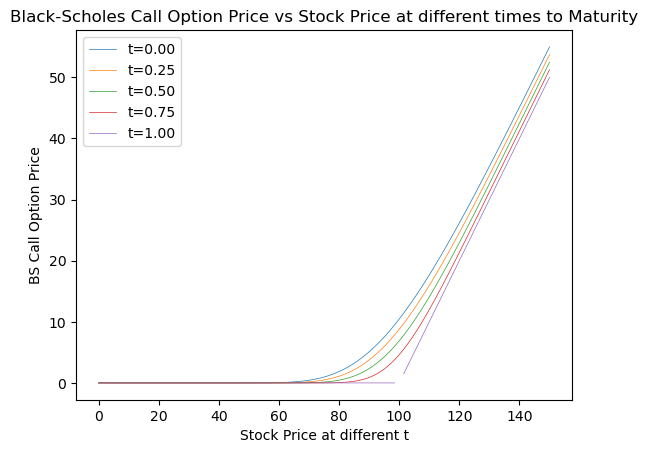

In [32]:
for i, t in enumerate(t_candidates):
    plt.plot(S_grid, c[i], label=f't={t:.2f}',linewidth=0.5)

plt.xlabel('Stock Price at different t')
plt.ylabel('BS Call Option Price')
plt.title('Black-Scholes Call Option Price vs Stock Price at different times to Maturity')
plt.legend()